In [ ]:
%run -i rename.py

In [ ]:
from models import Net2x, Net3x, Net4x, NetDN
models = [
    # model Class, kwargs, root, *paths
    (Net2x, {}, 0, '../model/a2/model_new.pth', '../model/p2/model_new.pth'),
    (Net3x, {}, 0, '../model/a3/model_new.pth', '../model/p3/model_new.pth'),
    (Net4x, {}, 0, '../model/a4/model_new.pth', '../model/p4/model_new.pth'),
    (NetDN, {}, 0, '../model/dn_lite5/model_new.pth', '../model/dn_lite10/model_new.pth', '../model/dn_lite15/model_new.pth')
]

In [ ]:
from models import RRDBNet
models = [
    (RRDBNet, {'num_in_ch': 3, 'num_out_ch': 3, 'scale': 2}, 'params_ema', '../model/gan/RealESRGAN_x2plus.pth'),
    (RRDBNet, {'num_in_ch': 3, 'num_out_ch': 3}, 'params_ema', '../model/gan/RealESRGAN_x4plus.pth')
]
subs = [
    (re.compile(r'(body.[\d]+.rdb[\d]+.)conv([\d]+)(\..*)'), lambda m: ''.join((m[1], 'conv.', str(int(m[2]) - 1), m[3])))
]

In [ ]:
rsts = [
    # match, replace, with, suffix, insert
    ((r'convt_F.\.',), None, None, '', '0.')
]

In [ ]:
m = renameByRules(models, subs=subs)

In [ ]:
m = m.to(dtype=config.dtype(), device=config.device()).eval()
opt = Option(models[-1][-1])
opt.scale = 4
opt.padding = 5
opt.align = 32
opt.ramCoef = 1 / 190000.
opt.squeeze = lambda x: x.squeeze(0)
opt.unsqueeze = lambda x: x.unsqueeze(0)
opt.modelCached = m

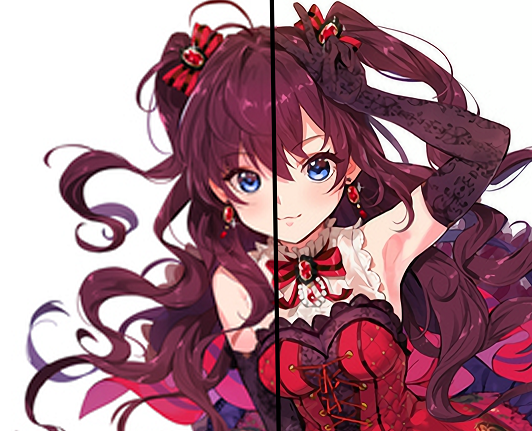

In [11]:
original = readPic('../images/example1sn.png')
show(original)

In [ ]:
y = ensemble(opt)(x)
show(y)